# We Import necessary libraries to use in this analysis

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# The data herein is grouped in months so we use glob module to merge all the data herein.

In [3]:
import glob
files = glob.glob('./Sales_Data/*')
df_list=[]
for file in files:
    data=pd.read_csv(file)
    df_list.append(data)
salesdata=pd.concat(df_list)
salesdata.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
salesdata.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [5]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Cleaning the data

In [6]:
#Find the Missing Values in our data
salesdata.isnull().sum() #returns the sum of missing values in the dataset per column

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# Dropping Missing Values in Pandas

In [7]:
sales=salesdata.dropna(axis=0,how='any').reset_index(drop=True)
sales.isnull().sum()
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Check for Duplicates in our Dataset

In [8]:
sales.duplicated().sum()#returns the total numbers of duplicated values
sales.duplicated().value_counts()#returns the numbers duplicated as True and those not duplicated as False

False    185687
True        618
dtype: int64

In [9]:
sales.drop_duplicates(inplace=True)#Drops all duplicates in the data
sales.duplicated().sum()
sales.shape

(185687, 6)

# Check datatype for columns

In [10]:
%%time
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB
CPU times: total: 203 ms
Wall time: 214 ms


In [11]:
%%time
#make int
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'],errors="coerce")
# make float 
sales['Price Each'] = pd.to_numeric(sales['Price Each'],errors="coerce")
sales.dtypes

CPU times: total: 328 ms
Wall time: 306 ms


Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [12]:
sales.head(5)#Displays the first 5 rows of the dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
%%time
sales["Order Date"]=pd.to_datetime(sales["Order Date"],errors="coerce") #converting the Orders date column to datetime type from object data type
sales.dtypes

CPU times: total: 21.5 s
Wall time: 21.5 s


Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [14]:
sales["Month"]=sales["Order Date"].dt.month #creating a month column from the data

In [15]:
sales["Day"]=sales["Order Date"].dt.day #creating a day column from the data

In [16]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,19.0
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,7.0
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,30.0


# Adding a new Sales Column

In [17]:
sales["Total Sales"]=sales['Quantity Ordered']*sales["Price Each"]

In [18]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Total Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,19.0,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,7.0,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,30.0,11.99


# DATA ANALYSIS

# MONTH WITH MANY SALES

In [19]:
sales1=sales.groupby("Month")["Total Sales"].sum().sort_values(ascending=False).reset_index()
sales1

,Month,Total Sales
0,12.0,4608295.70
1,10.0,3734777.86
2,4.0,3389217.98
3,11.0,3197875.05
4,5.0,3150616.23
5,3.0,2804973.35
6,7.0,2646461.32
7,6.0,2576280.15
8,8.0,2241083.37
9,2.0,2200078.08


# From the results herein December is the month with the most sales compared to others, The plot below shows a graphical representation of Totals Sales of the Months

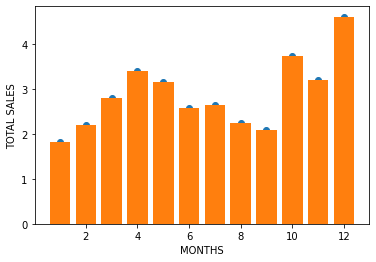

In [20]:
#Plotting the data using matplotlib
plt.scatter(sales1["Month"],sales1["Total Sales"]/1000000)#scatter plot of the data
plt.bar(sales1["Month"],sales1["Total Sales"]/1000000)#bar plot of the data
plt.xlabel("MONTHS")
plt.ylabel("TOTAL SALES")
plt.show()

In [81]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Total Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,19.0,23.90,"917 1st St,917 1st St"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,7.0,99.99,"682 Chestnut St,682 Chestnut St"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0,600.00,"669 Spruce St,669 Spruce St"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,12.0,11.99,"669 Spruce St,669 Spruce St"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,30.0,11.99,"333 8th St,333 8th St"


# Finding products that sold most

In [39]:
sales_product=sales.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).reset_index()
sales_product

,Product,Quantity Ordered
0,AAA Batteries (4-pack),30986.0
1,AA Batteries (4-pack),27615.0
2,USB-C Charging Cable,23931.0
3,Lightning Charging Cable,23169.0
4,Wired Headphones,20524.0
5,Apple Airpods Headphones,15637.0
6,Bose SoundSport Headphones,13430.0
7,27in FHD Monitor,7541.0
8,iPhone,6847.0
9,27in 4K Gaming Monitor,6239.0


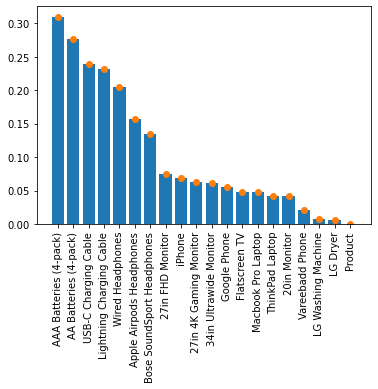

In [51]:
plt.bar(sales_product["Product"],sales_product["Quantity Ordered"]/100000)
plt.xticks(sales_product["Product"].values,rotation="vertical",size=10)
plt.scatter(sales_product["Product"],sales_product["Quantity Ordered"]/100000)
plt.show()

In [50]:
sales_analysis=ProfileReport(sales,explorative=True)
sales_analysis

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]